### Прогноз размещения на площадке (организаторы) 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#Немоного изменим параметры вывода графиков
rcParams['figure.figsize'] = 18,10

In [3]:
data = pd.read_excel('ОрганизаторыМесяца.xlsx')
data.head()

,OrgID,M1,M2,M3,M4,M5,M6,M7,M8,M9,...,M27,M28,M29,M30,M31,M32,M33,M34,M35,M36
0,4846562,0,0,0,0,0,0,0,0,0,...,6,5,15,1,0,3,1,0,0,0
1,2654622,0,0,0,1,0,0,0,0,0,...,5,7,1,5,5,3,2,0,0,0
2,2683009,0,0,0,0,0,0,0,0,0,...,2,2,6,4,0,3,1,0,0,0
3,4852135,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,2,0,0,0
4,2707151,0,0,10,0,1,1,0,0,5,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13952 entries, 0 to 13951
Data columns (total 37 columns):
OrgID    13952 non-null int64
M1       13952 non-null int64
M2       13952 non-null int64
M3       13952 non-null int64
M4       13952 non-null int64
M5       13952 non-null int64
M6       13952 non-null int64
M7       13952 non-null int64
M8       13952 non-null int64
M9       13952 non-null int64
M10      13952 non-null int64
M11      13952 non-null int64
M12      13952 non-null int64
M13      13952 non-null int64
M14      13952 non-null int64
M15      13952 non-null int64
M16      13952 non-null int64
M17      13952 non-null int64
M18      13952 non-null int64
M19      13952 non-null int64
M20      13952 non-null int64
M21      13952 non-null int64
M22      13952 non-null int64
M23      13952 non-null int64
M24      13952 non-null int64
M25      13952 non-null int64
M26      13952 non-null int64
M27      13952 non-null int64
M28      13952 non-null int64
M29      13952 non-nu

In [5]:
melt = data.melt(id_vars='OrgID', var_name='Month', value_name='Proc')

melt['Month'] = melt['Month'].str.extract('(\d+)', expand=False).astype(int)

melt = melt.sort_values(['OrgID', 'Month'])
melt.head()

,OrgID,Month,Proc
9562,2477540,1,0
23514,2477540,2,0
37466,2477540,3,0
51418,2477540,4,0
65370,2477540,5,0


In [6]:
melt2 =  melt.copy()
melt2['Last_Month_Proc'] = melt2.groupby(['OrgID'])['Proc'].shift()
melt2['Last_Month_Diff'] = melt2.groupby(['OrgID'])['Last_Month_Proc'].diff()
melt2 = melt2.dropna()
melt2.head()

,OrgID,Month,Proc,Last_Month_Proc,Last_Month_Diff
37466,2477540,3,0,0.0,0.0
51418,2477540,4,0,0.0,0.0
65370,2477540,5,0,0.0,0.0
79322,2477540,6,0,0.0,0.0
93274,2477540,7,0,0.0,0.0


In [7]:
melt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474368 entries, 37466 to 493885
Data columns (total 5 columns):
OrgID              474368 non-null int64
Month              474368 non-null int32
Proc               474368 non-null int64
Last_Month_Proc    474368 non-null float64
Last_Month_Diff    474368 non-null float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 19.9 MB


In [8]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [9]:
import copy

In [10]:
procedures = []
for Month in range(0,30):
    val=melt2[melt2['Month'] == Month]
    total=sum(val['Proc'])
    procedures.append(total)

In [11]:
%%time
mean_errorB = []
total_errorB = []
ProcB = copy.copy(procedures)
predict_ProcB = copy.copy(procedures)
for Month in range(30,33):
    train = melt2[melt2['Month'] < Month]
    val = melt2[melt2['Month'] == Month]
    yts=val['Proc']
    
    p = val['Last_Month_Proc'].values
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorB.append(error)
    total_errorB.append(abs_error)
    ProcB.append(total_yts)
    predict_ProcB.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorB))
print('Mean Abs Error = %.5f' % np.mean(total_errorB))

Month 30 - Error 0.61502, Real Total 44141.0 - Predict Total 43152.0, Abs Error 989.0
Month 31 - Error 0.63258, Real Total 32367.0 - Predict Total 44141.0, Abs Error 11774.0
Month 32 - Error 0.62189, Real Total 40749.0 - Predict Total 32367.0, Abs Error 8382.0
Mean Error = 0.62316
Mean Abs Error = 7048.33333
Wall time: 78.3 ms


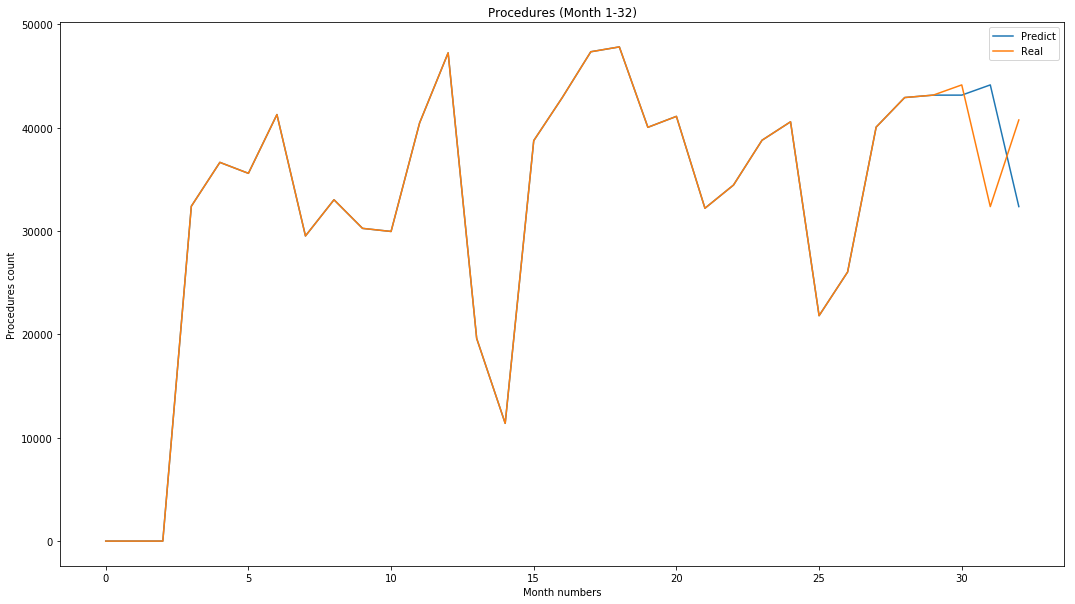

In [12]:

plt.plot(predict_ProcB)
plt.plot(ProcB)
plt.title('Procedures (Month 1-32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

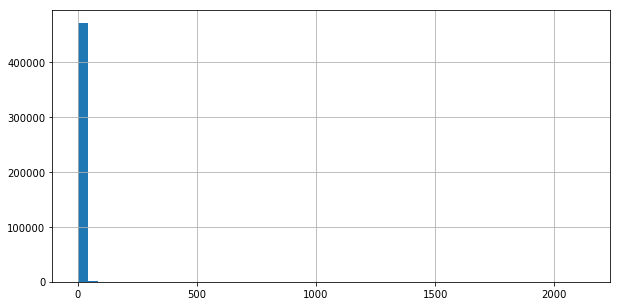

In [13]:
melt2['Proc'].hist(bins=50, figsize=(10,5))

In [14]:
%%time
mean_error2 = []
total_error2 = []
Proc2 = copy.copy(procedures)
predict_Proc2 = copy.copy(procedures)
for Month in range(30,33):
    train = melt2[melt2['Month'] < Month]
    val = melt2[melt2['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LinearRegression()
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_error2.append(error)
    total_error2.append(abs_error)
    Proc2.append(total_yts)
    predict_Proc2.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_error2))
print('Mean Abs Error = %.5f' % np.mean(total_error2))

Month 30 - Error 0.60004, Real Total 44141.0 - Predict Total 43044.1, Abs Error 1096.9
Month 31 - Error 0.63024, Real Total 32367.0 - Predict Total 44069.8, Abs Error 11702.8
Month 32 - Error 0.58768, Real Total 40749.0 - Predict Total 32611.1, Abs Error 8137.9
Mean Error = 0.60599
Mean Abs Error = 6979.21429
Wall time: 322 ms


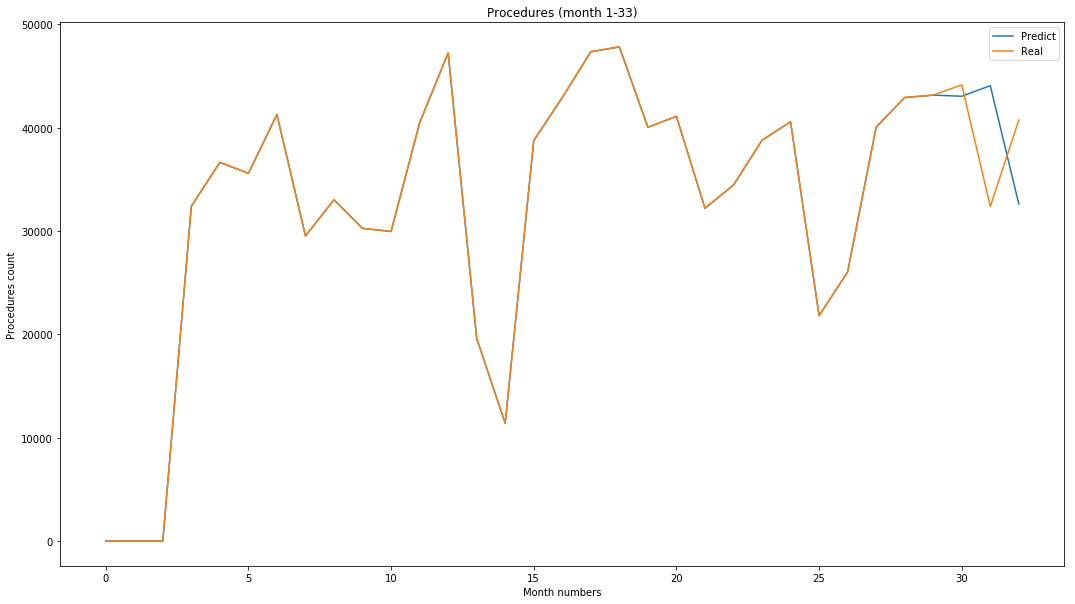

In [15]:

plt.plot(predict_Proc2)
plt.plot(Proc2)
plt.title('Procedures (month 1-33)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [16]:
%%time
mean_errorRF2 = []
total_errorRF2 = []
ProcRF2 = copy.copy(procedures)
predict_ProcRF2 = copy.copy(procedures)
for Month in range(30,33):
    train = melt2[melt2['Month'] < Month]
    val = melt2[melt2['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorRF2.append(error)
    total_errorRF2.append(abs_error)
    ProcRF2.append(total_yts)
    predict_ProcRF2.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorRF2))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF2))

Month 30 - Error 0.61318, Real Total 44141.0 - Predict Total 46522.4, Abs Error 2381.4
Month 31 - Error 0.64715, Real Total 32367.0 - Predict Total 45537.5, Abs Error 13170.5
Month 32 - Error 0.59373, Real Total 40749.0 - Predict Total 32946.0, Abs Error 7803.0
Mean Error = 0.61802
Mean Abs Error = 7784.94967
Wall time: 10min 55s


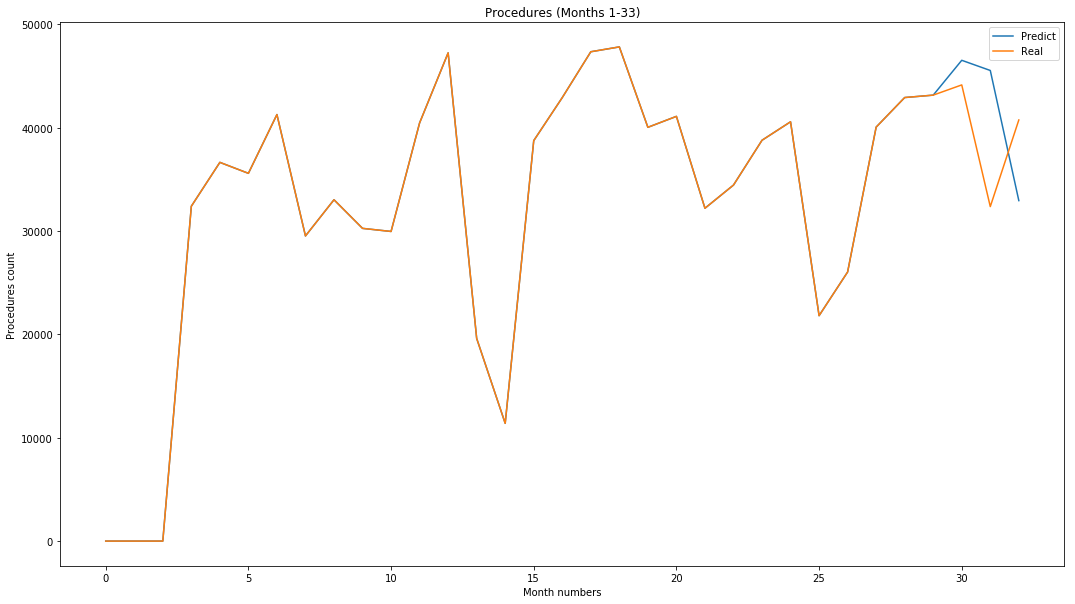

In [17]:

plt.plot(predict_ProcRF2)
#plt.plot(ProcRF2)
plt.plot(ProcB)
plt.title('Procedures (Months 1-33)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [18]:
melt3 = melt.copy()
melt3['Last_Month_Proc'] = melt3.groupby(['OrgID'])['Proc'].shift()
melt3['Last_Month_Diff'] = melt3.groupby(['OrgID'])['Last_Month_Proc'].diff()
melt3['Last-1_Month_Proc'] = melt3.groupby(['OrgID'])['Proc'].shift(2)
melt3['Last-1_Month_Diff'] = melt3.groupby(['OrgID'])['Last-1_Month_Proc'].diff()
melt3 = melt3.dropna()
melt3.head()

,OrgID,Month,Proc,Last_Month_Proc,Last_Month_Diff,Last-1_Month_Proc,Last-1_Month_Diff
51418,2477540,4,0,0.0,0.0,0.0,0.0
65370,2477540,5,0,0.0,0.0,0.0,0.0
79322,2477540,6,0,0.0,0.0,0.0,0.0
93274,2477540,7,0,0.0,0.0,0.0,0.0
107226,2477540,8,0,0.0,0.0,0.0,0.0


In [19]:
%%time
mean_errorRF3 = []
total_errorRF3 = []
ProcRF3 = copy.copy(procedures)
predict_ProcRF3 = copy.copy(procedures)
for Month in range(30,33):
    train = melt3[melt3['Month'] < Month]
    val = melt3[melt3['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorRF3.append(error)
    total_errorRF3.append(abs_error)
    ProcRF3.append(total_yts)
    predict_ProcRF3.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorRF3))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF3))

Month 30 - Error 0.62489, Real Total 44141.0 - Predict Total 49088.1, Abs Error 4947.1
Month 31 - Error 0.64909, Real Total 32367.0 - Predict Total 47070.2, Abs Error 14703.2
Month 32 - Error 0.59636, Real Total 40749.0 - Predict Total 35264.6, Abs Error 5484.4
Mean Error = 0.62345
Mean Abs Error = 8378.21433
Wall time: 12min 41s


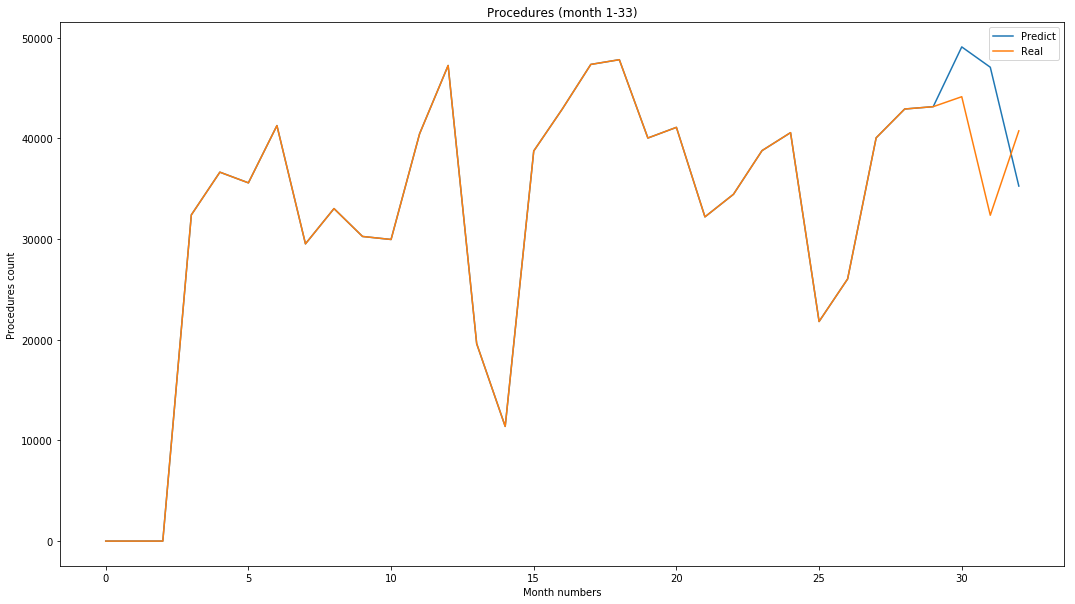

In [20]:

plt.plot(predict_ProcRF3)
plt.plot(ProcRF3)
plt.title('Procedures (month 1-33)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [21]:
melt4 = melt.copy()
melt4['Last_Month_Proc'] = melt4.groupby(['OrgID'])['Proc'].shift()
melt4['Last_Month_Diff'] = melt4.groupby(['OrgID'])['Last_Month_Proc'].diff()
melt4['Last-1_Month_Proc'] = melt4.groupby(['OrgID'])['Proc'].shift(2)
melt4['Last-1_Month_Diff'] = melt4.groupby(['OrgID'])['Last-1_Month_Proc'].diff()
melt4['Last-2_Month_Proc'] = melt4.groupby(['OrgID'])['Proc'].shift(3)
melt4['Last-2_Month_Diff'] = melt4.groupby(['OrgID'])['Last-2_Month_Proc'].diff()
melt4 = melt4.dropna()
melt4.head()

,OrgID,Month,Proc,Last_Month_Proc,Last_Month_Diff,Last-1_Month_Proc,Last-1_Month_Diff,Last-2_Month_Proc,Last-2_Month_Diff
65370,2477540,5,0,0.0,0.0,0.0,0.0,0.0,0.0
79322,2477540,6,0,0.0,0.0,0.0,0.0,0.0,0.0
93274,2477540,7,0,0.0,0.0,0.0,0.0,0.0,0.0
107226,2477540,8,0,0.0,0.0,0.0,0.0,0.0,0.0
121178,2477540,9,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
%%time
mean_errorRF4 = []
total_errorRF4 = []
ProcRF4 = copy.copy(procedures)
predict_ProcRF4 = copy.copy(procedures)
for Month in range(30,33):
    train = melt4[melt4['Month'] < Month]
    val = melt4[melt4['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorRF4.append(error)
    total_errorRF4.append(abs_error)
    ProcRF4.append(total_yts)
    predict_ProcRF4.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorRF4))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF4))

Month 30 - Error 0.62712, Real Total 44141.0 - Predict Total 47581.2, Abs Error 3440.2
Month 31 - Error 0.66628, Real Total 32367.0 - Predict Total 48037.4, Abs Error 15670.4
Month 32 - Error 0.59339, Real Total 40749.0 - Predict Total 36732.1, Abs Error 4016.9
Mean Error = 0.62893
Mean Abs Error = 7709.19100
Wall time: 14min 29s


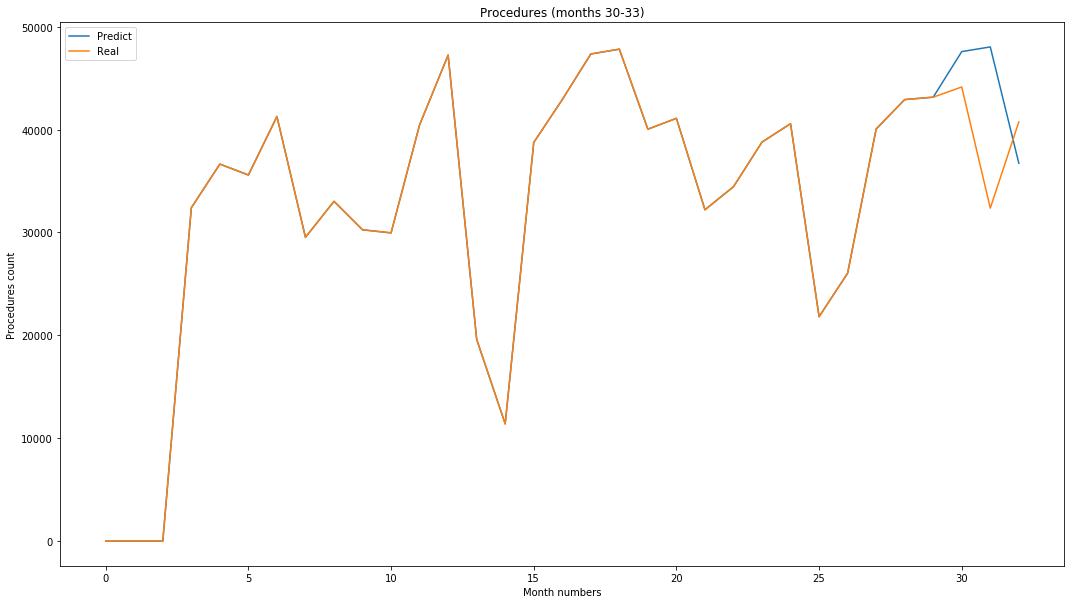

In [23]:

plt.plot(predict_ProcRF4)
plt.plot(ProcRF4)
plt.title('Procedures (months 30-33)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [24]:
%%time
mean_errorGB4 = []
total_errorGB4 = []
ProcGB4 = copy.copy(procedures)
predict_ProcGB4 = copy.copy(procedures)
for Month in range(30,33):
    train = melt4[melt4['Month'] < Month]
    val = melt4[melt4['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    #print('Month %d - Error %.5f' % (Month, error))
    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorGB4.append(error)
    total_errorGB4.append(abs_error)
    ProcGB4.append(total_yts)
    predict_ProcGB4.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorGB4))
print('Mean Abs Error = %.5f' % np.mean(total_errorGB4))

Month 30 - Error 0.52288, Real Total 44141.0 - Predict Total 36215.0, Abs Error 7926.0
Month 31 - Error 0.52243, Real Total 32367.0 - Predict Total 36700.2, Abs Error 4333.2
Month 32 - Error 0.53680, Real Total 40749.0 - Predict Total 22870.5, Abs Error 17878.5
Mean Error = 0.52737
Mean Abs Error = 10045.87870
Wall time: 23.4 s


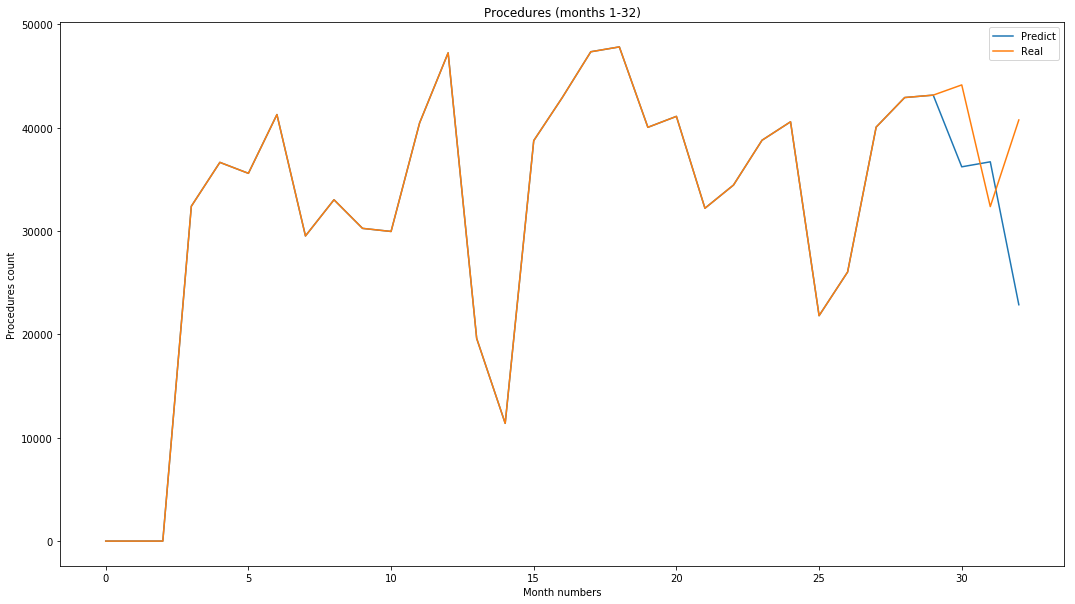

In [25]:

plt.plot(predict_ProcGB4)
plt.plot(ProcGB4)
plt.title('Procedures (months 1-32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [26]:
%%time
melt12 = melt.copy()
melt12['Last_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift()
melt12['Last_Month_Diff'] = melt12.groupby(['OrgID'])['Last_Month_Proc'].diff()
melt12['Last-1_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(2)
melt12['Last-1_Month_Diff'] = melt12.groupby(['OrgID'])['Last-1_Month_Proc'].diff()
melt12['Last-2_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-2_Month_Diff'] = melt12.groupby(['OrgID'])['Last-2_Month_Proc'].diff()
melt12['Last-3_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-3_Month_Diff'] = melt12.groupby(['OrgID'])['Last-3_Month_Proc'].diff()
melt12['Last-4_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-4_Month_Diff'] = melt12.groupby(['OrgID'])['Last-4_Month_Proc'].diff()
melt12['Last-5_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-5_Month_Diff'] = melt12.groupby(['OrgID'])['Last-5_Month_Proc'].diff()
melt12['Last-6_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-6_Month_Diff'] = melt12.groupby(['OrgID'])['Last-6_Month_Proc'].diff()
melt12['Last-7_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-7_Month_Diff'] = melt12.groupby(['OrgID'])['Last-7_Month_Proc'].diff()
melt12['Last-8_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-8_Month_Diff'] = melt12.groupby(['OrgID'])['Last-8_Month_Proc'].diff()
melt12['Last-9_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-9_Month_Diff'] = melt12.groupby(['OrgID'])['Last-9_Month_Proc'].diff()
melt12['Last-10_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-10_Month_Diff'] = melt12.groupby(['OrgID'])['Last-10_Month_Proc'].diff()
melt12['Last-11_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(2)
melt12['Last-11_Month_Diff'] = melt12.groupby(['OrgID'])['Last-11_Month_Proc'].diff()
melt12['Last-12_Month_Proc'] = melt12.groupby(['OrgID'])['Proc'].shift(3)
melt12['Last-12_Month_Diff'] = melt12.groupby(['OrgID'])['Last-12_Month_Proc'].diff()
melt12 = melt12.dropna()
melt12.head()

Wall time: 24.3 s


In [27]:
%%time
mean_errorRF12 = []
total_errorRF12 = []
ProcRF12 = copy.copy(procedures)
predict_ProcRF12 = copy.copy(procedures)
for Month in range(30, 33):
    train = melt12[melt12['Month'] < Month]
    val = melt12[melt12['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorRF12.append(error)
    total_errorRF12.append(abs_error)
    ProcRF12.append(total_yts)
    predict_ProcRF12.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorRF12))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF12))

Month 30 - Error 0.62777, Real Total 44141.0 - Predict Total 47527.1, Abs Error 3386.1
Month 31 - Error 0.66733, Real Total 32367.0 - Predict Total 47987.3, Abs Error 15620.3
Month 32 - Error 0.59433, Real Total 40749.0 - Predict Total 36767.5, Abs Error 3981.5
Mean Error = 0.62981
Mean Abs Error = 7662.62667
Wall time: 33min 24s


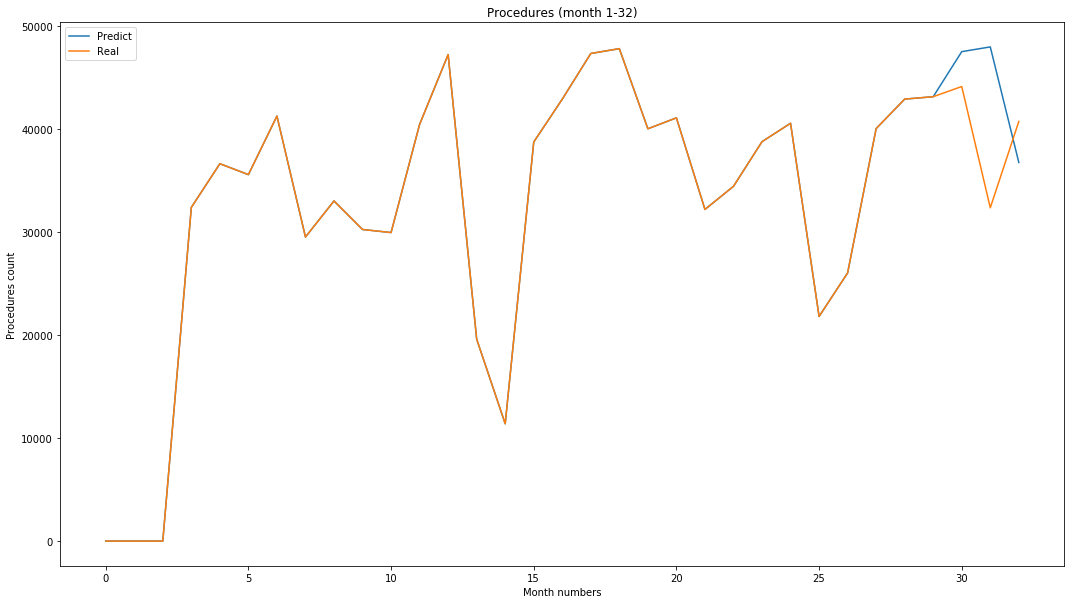

In [28]:

plt.plot(predict_ProcRF12)
plt.plot(ProcRF12)
plt.title('Procedures (month 1-32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [29]:
%%time
mean_errorGB12 = []
total_errorGB12 = []
ProcGB12 = copy.copy(procedures)
predict_ProcGB12 = copy.copy(procedures)
for Month in range(30,33):
    train = melt12[melt12['Month'] < Month]
    val = melt12[melt12['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    
    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorGB12.append(error)
    total_errorGB12.append(abs_error)
    ProcGB12.append(total_yts)
    predict_ProcGB12.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorGB12))
print('Mean Abs Error = %.5f' % np.mean(total_errorGB12))

Month 30 - Error 0.52288, Real Total 44141.0 - Predict Total 36215.0, Abs Error 7926.0
Month 31 - Error 0.52243, Real Total 32367.0 - Predict Total 36700.2, Abs Error 4333.2
Month 32 - Error 0.53680, Real Total 40749.0 - Predict Total 22870.5, Abs Error 17878.5
Mean Error = 0.52737
Mean Abs Error = 10045.87870
Wall time: 55.2 s


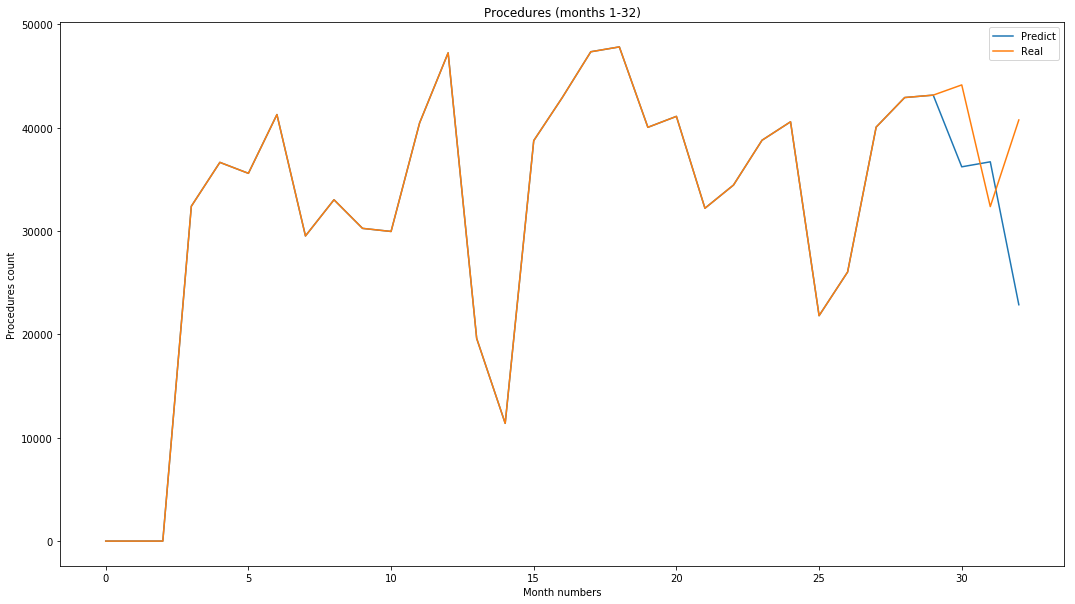

In [30]:

plt.plot(predict_ProcGB12)
plt.plot(ProcGB12)
plt.title('Procedures (months 1-32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [31]:
%%time
mean_errorLR12 = []
total_errorLR12 = []
ProcLR12 = copy.copy(procedures)
predict_ProcLR12 = copy.copy(procedures)
for Month in range(30,33):
    train = melt12[melt12['Month'] < Month]
    val = melt12[melt12['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LinearRegression()
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorLR12.append(error)
    total_errorLR12.append(abs_error)
    ProcLR12.append(total_yts)
    predict_ProcLR12.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorLR12))
print('Mean Abs Error = %.5f' % np.mean(total_errorLR12))

C:\Users\solod\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

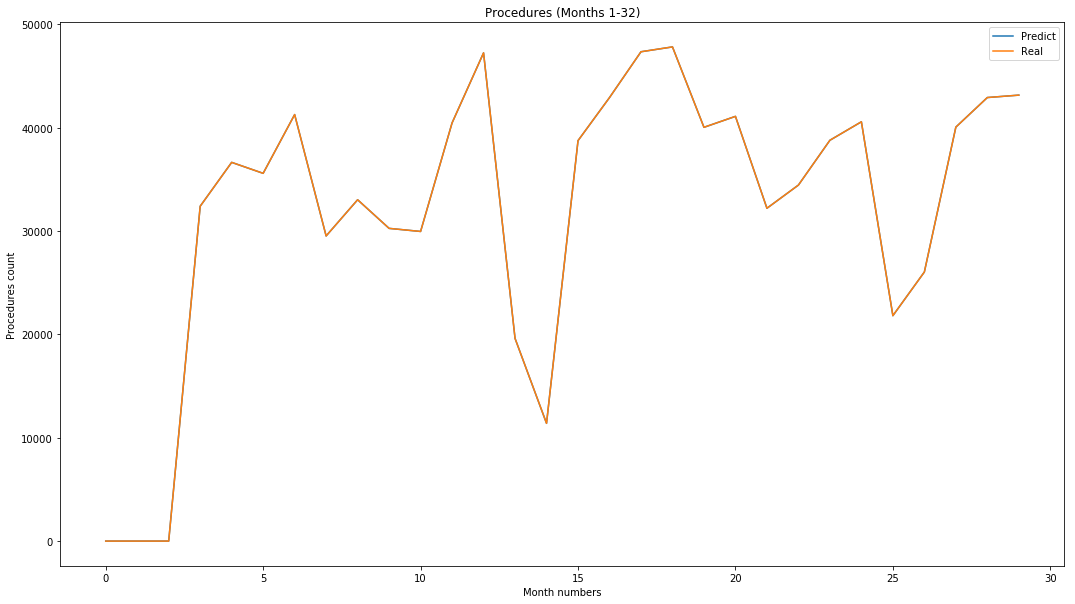

In [32]:

plt.plot(predict_ProcLR12)
plt.plot(ProcLR12)
plt.title('Procedures (Months 1-32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

C:\Users\solod\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\solod\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


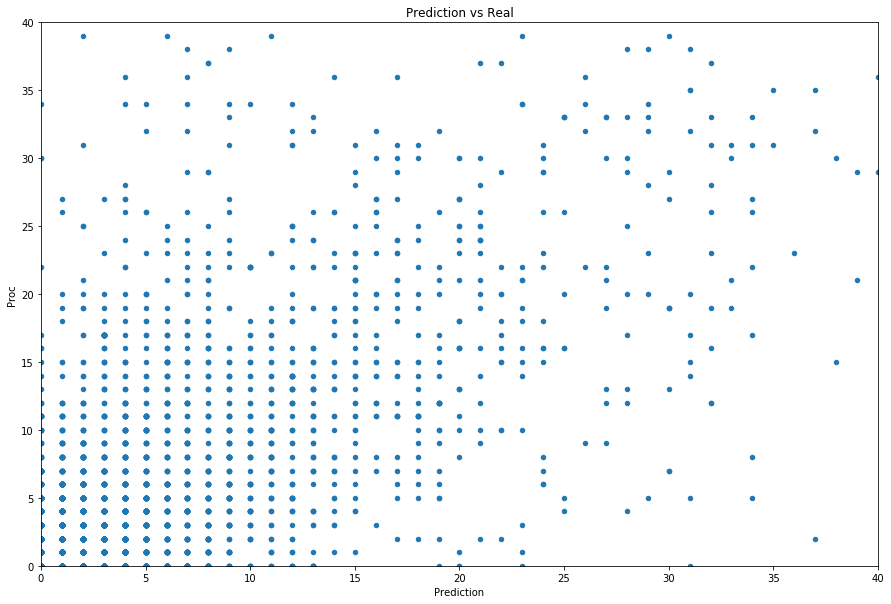

In [33]:
val.loc[:, 'Prediction'] = np.round(p)
val.plot.scatter(x='Prediction', y='Proc', figsize=(15,10), title='Prediction vs Real', 
                 ylim=(0,40), xlim=(0,40))

In [34]:
%%time
melt24 = melt.copy()
melt24['Last_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift()
melt24['Last_Month_Diff'] = melt24.groupby(['OrgID'])['Last_Month_Proc'].diff()
melt24['Last-1_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(2)
melt24['Last-1_Month_Diff'] = melt24.groupby(['OrgID'])['Last-1_Month_Proc'].diff()
melt24['Last-2_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-2_Month_Diff'] = melt24.groupby(['OrgID'])['Last-2_Month_Proc'].diff()
melt24['Last-3_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-3_Month_Diff'] = melt24.groupby(['OrgID'])['Last-3_Month_Proc'].diff()
melt24['Last-4_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-4_Month_Diff'] = melt24.groupby(['OrgID'])['Last-4_Month_Proc'].diff()
melt24['Last-5_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-5_Month_Diff'] = melt24.groupby(['OrgID'])['Last-5_Month_Proc'].diff()
melt24['Last-6_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-6_Month_Diff'] = melt24.groupby(['OrgID'])['Last-6_Month_Proc'].diff()
melt24['Last-7_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-7_Month_Diff'] = melt24.groupby(['OrgID'])['Last-7_Month_Proc'].diff()
melt24['Last-8_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-8_Month_Diff'] = melt24.groupby(['OrgID'])['Last-8_Month_Proc'].diff()
melt24['Last-9_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-9_Month_Diff'] = melt24.groupby(['OrgID'])['Last-9_Month_Proc'].diff()
melt24['Last-10_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-10_Month_Diff'] = melt24.groupby(['OrgID'])['Last-10_Month_Proc'].diff()
melt24['Last-11_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(2)
melt24['Last-11_Month_Diff'] = melt24.groupby(['OrgID'])['Last-11_Month_Proc'].diff()
melt24['Last-12_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-12_Month_Diff'] = melt24.groupby(['OrgID'])['Last-12_Month_Proc'].diff()
melt24['Last-13_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-13_Month_Diff'] = melt24.groupby(['OrgID'])['Last-13_Month_Proc'].diff()
melt24['Last-14_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-14_Month_Diff'] = melt24.groupby(['OrgID'])['Last-14_Month_Proc'].diff()
melt24['Last-15_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-15_Month_Diff'] = melt24.groupby(['OrgID'])['Last-15_Month_Proc'].diff()
melt24['Last-16_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-16_Month_Diff'] = melt24.groupby(['OrgID'])['Last-16_Month_Proc'].diff()
melt24['Last-17_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-17_Month_Diff'] = melt24.groupby(['OrgID'])['Last-17_Month_Proc'].diff()
melt24['Last-18_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-18_Month_Diff'] = melt24.groupby(['OrgID'])['Last-18_Month_Proc'].diff()
melt24['Last-19_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-19_Month_Diff'] = melt24.groupby(['OrgID'])['Last-19_Month_Proc'].diff()
melt24['Last-20_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-20_Month_Diff'] = melt24.groupby(['OrgID'])['Last-20_Month_Proc'].diff()
melt24['Last-21_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(2)
melt24['Last-21_Month_Diff'] = melt24.groupby(['OrgID'])['Last-21_Month_Proc'].diff()
melt24['Last-22_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-22_Month_Diff'] = melt24.groupby(['OrgID'])['Last-22_Month_Proc'].diff()
melt24['Last-23_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24['Last-23_Month_Diff'] = melt24.groupby(['OrgID'])['Last-23_Month_Proc'].diff()
melt24['Last-24_Month_Proc'] = melt24.groupby(['OrgID'])['Proc'].shift(3)
melt24 = melt24.dropna()
melt24.head()

Wall time: 53.1 s


In [35]:
%%time
mean_errorRF24 = []
total_errorRF24 = []
ProcRF24 = copy.copy(procedures)
predict_ProcRF24 = copy.copy(procedures)
for Month in range(30,33):
    train = melt24[melt24['Month'] < Month]
    val = melt24[melt24['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    
    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorRF24.append(error)
    total_errorRF24.append(abs_error)
    ProcRF24.append(total_yts)
    predict_ProcRF24.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorRF24))
print('Mean Abs Error = %.5f' % np.mean(total_errorRF24))

Month 30 - Error 0.62798, Real Total 44141.0 - Predict Total 47522.9, Abs Error 3381.9
Month 31 - Error 0.66720, Real Total 32367.0 - Predict Total 47972.8, Abs Error 15605.8
Month 32 - Error 0.59422, Real Total 40749.0 - Predict Total 36751.2, Abs Error 3997.8
Mean Error = 0.62980
Mean Abs Error = 7661.82800
Wall time: 54min 17s


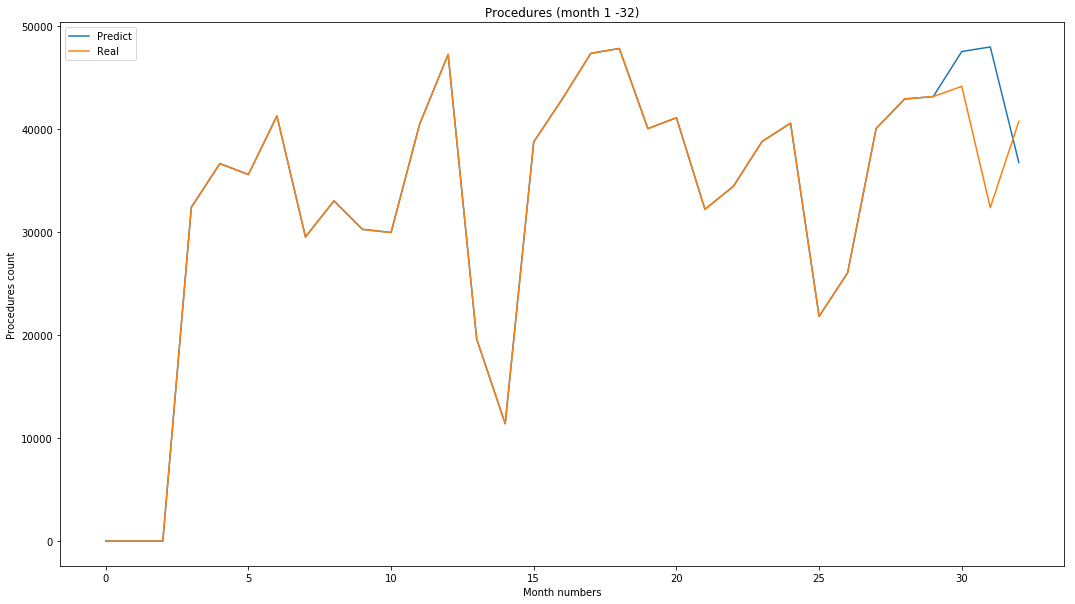

In [36]:

plt.plot(predict_ProcRF24)
plt.plot(ProcRF24)
plt.title('Procedures (month 1 -32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

In [37]:
%%time
mean_errorGB24 = []
total_errorGB24 = []
ProcGB24 = copy.copy(procedures)
predict_ProcGB24 = copy.copy(procedures)
for Month in range(30,33):
    train = melt24[melt24['Month'] < Month]
    val = melt24[melt24['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)
    
    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorGB24.append(error)
    total_errorGB24.append(abs_error)
    ProcGB24.append(total_yts)
    predict_ProcGB24.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorGB24))
print('Mean Abs Error = %.5f' % np.mean(total_errorGB24))

Month 30 - Error 0.52288, Real Total 44141.0 - Predict Total 36215.0, Abs Error 7926.0
Month 31 - Error 0.52243, Real Total 32367.0 - Predict Total 36700.2, Abs Error 4333.2
Month 32 - Error 0.53680, Real Total 40749.0 - Predict Total 22870.5, Abs Error 17878.5
Mean Error = 0.52737
Mean Abs Error = 10045.87870
Wall time: 1min 27s


In [39]:
%%time
mean_errorLR24 = []
total_errorLR24 = []
ProcLR24 = copy.copy(procedures)
predict_ProcLR24 = copy.copy(procedures)
for Month in range(30,33):
    train = melt24[melt24['Month'] < Month]
    val = melt24[melt24['Month'] == Month]
    
    xtr, xts = train.drop(['Proc'], axis=1), val.drop(['Proc'], axis=1)
    ytr, yts = train['Proc'].values, val['Proc'].values
    
    mdl = LinearRegression()
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    total_yts=sum(yts)
    total_p=sum(p)
    
    error = rmsle(yts, p)
    abs_error = abs(total_yts-total_p)

    print('Month %d - Error %.5f, Real Total %.1f - Predict Total %.1f, Abs Error %.1f' % (Month, error, total_yts, total_p, abs_error))
    mean_errorLR24.append(error)
    total_errorLR24.append(abs_error)
    ProcLR24.append(total_yts)
    predict_ProcLR24.append(total_p)
print('Mean Error = %.5f' % np.mean(mean_errorLR24))
print('Mean Abs Error = %.5f' % np.mean(total_errorLR24))

C:\Users\solod\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

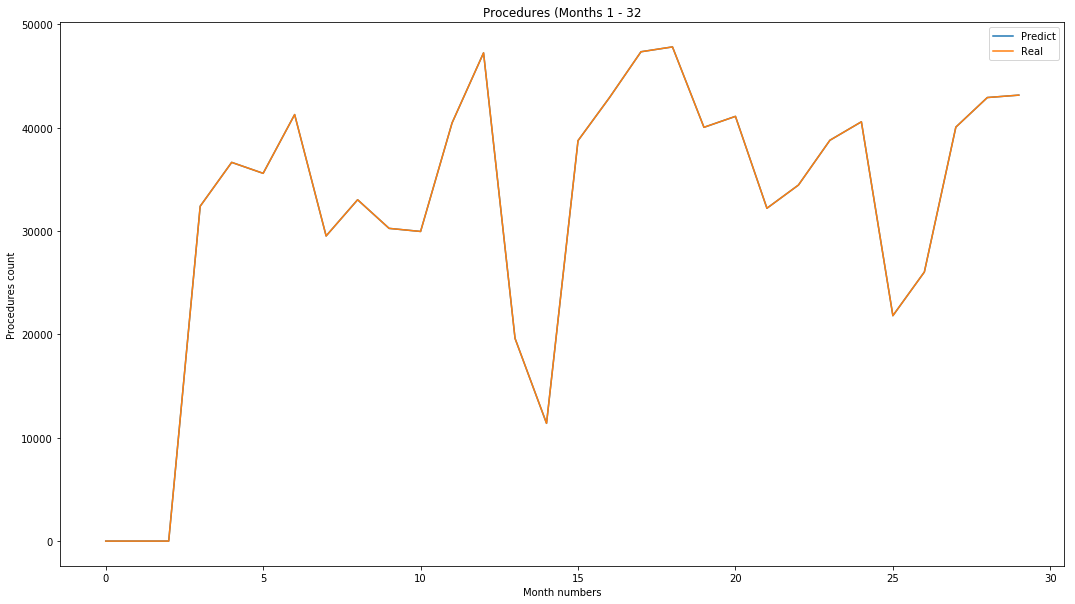

In [40]:

plt.plot(predict_ProcLR24)
plt.plot(ProcLR24)
plt.title('Procedures (Months 1 - 32')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict', 'Real'))

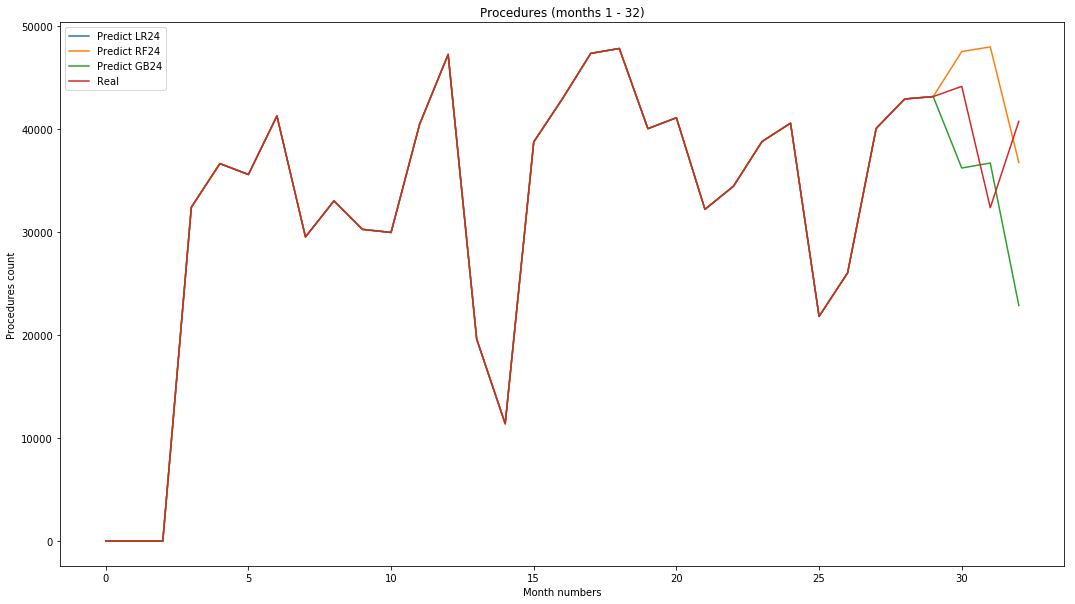

In [41]:
plt.plot(predict_ProcLR24)
plt.plot(predict_ProcRF24)
plt.plot(predict_ProcGB24)
plt.plot(ProcGB24)

plt.title('Procedures (months 1 - 32)')
plt.xlabel('Month numbers')
plt.ylabel('Procedures count')
plt.legend(('Predict LR24', 'Predict RF24', 'Predict GB24', 'Real'))

In [42]:
print('Mean Error baseline = %.5f' % np.mean(mean_errorB))
print('Mean Abs Error baseline = %.5f' % np.mean(total_errorB))
print('Mean Error LR2 = %.5f' % np.mean(mean_error2))
print('Mean Abs Error LR2 = %.5f' % np.mean(total_error2))
print('Mean Error RF2 = %.5f' % np.mean(mean_errorRF2))
print('Mean Abs Error RF2 = %.5f' % np.mean(total_errorRF2))
print('Mean Error RF3 = %.5f' % np.mean(mean_errorRF3))
print('Mean Abs Error RF3 = %.5f' % np.mean(total_errorRF3))
print('Mean Error RF4 = %.5f' % np.mean(mean_errorRF4))
print('Mean Abs Error RF4 = %.5f' % np.mean(total_errorRF4))
print('Mean Error GB4 = %.5f' % np.mean(mean_errorGB4))
print('Mean Abs Error GB4 = %.5f' % np.mean(total_errorGB4))
print('Mean Error LR12 = %.5f' % np.mean(mean_errorLR12))
print('Mean Abs Error LR12 = %.5f' % np.mean(total_errorLR12))
print('Mean Error RF12 = %.5f' % np.mean(mean_errorRF12))
print('Mean Abs Error RF12 = %.5f' % np.mean(total_errorRF12))
print('Mean Error GB12 = %.5f' % np.mean(mean_errorGB12))
print('Mean Abs Error GB12 = %.5f' % np.mean(total_errorGB12))
print('Mean Error LR24 = %.5f' % np.mean(mean_errorLR24))
print('Mean Abs Error LR24 = %.5f' % np.mean(total_errorLR24))
print('Mean Error RF24 = %.5f' % np.mean(mean_errorRF24))
print('Mean Abs Error RF24 = %.5f' % np.mean(total_errorRF24))
print('Mean Error GB24 = %.5f' % np.mean(mean_errorGB24))
print('Mean Abs Error GB24 = %.5f' % np.mean(total_errorGB24))

Mean Error baseline = 0.62316
Mean Abs Error baseline = 7048.33333
Mean Error LR2 = 0.60599
Mean Abs Error LR2 = 6979.21429
Mean Error RF2 = 0.61802
Mean Abs Error RF2 = 7784.94967
Mean Error RF3 = 0.62345
Mean Abs Error RF3 = 8378.21433
Mean Error RF4 = 0.62893
Mean Abs Error RF4 = 7709.19100
Mean Error GB4 = 0.52737
Mean Abs Error GB4 = 10045.87870
Mean Error LR12 = nan
Mean Abs Error LR12 = nan
Mean Error RF12 = 0.62981
Mean Abs Error RF12 = 7662.62667
Mean Error GB12 = 0.52737
Mean Abs Error GB12 = 10045.87870
Mean Error LR24 = nan
Mean Abs Error LR24 = nan
Mean Error RF24 = 0.62980
Mean Abs Error RF24 = 7661.82800
Mean Error GB24 = 0.52737
Mean Abs Error GB24 = 10045.87870


C:\Users\solod\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\solod\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
